# Outline

* [Setup](#setup)
* [MyNN](#mynn)
    * [Example 1: XOR](#mynn-xor)
    * [Example 2: Cat vs. not Cat](#mynn-cat)
* [Pytorch](#pytorch)
    * [Example 1: Cat vs. not Cat](#pytorch-cat)
* [Keras](#keras)
    * [Example 1: Cat vs. not Cat](#keras-cat)
* [Tensforflow](#tensorflow)
    * [Example 1: Cat vs. not Cat](#tensorflow-cat)

# Setup <a class='anchor' id='setup'></a>

In [1]:
import matplotlib.pyplot as plt

def plot_train_log(log, to_epoch=False, from_epoch=1, title=''):
    assert (from_epoch >= 1 and (to_epoch is False or to_epoch > from_epoch)), 'invalid epoch range'
    '''plots log = {'loss':[...], 'accuracy':[...], 'val_loss':[...], 'val_accuracy':[...]}
    '''
    to_epoch = len(log['loss'])+1 if not to_epoch else to_epoch+1
    epochs = np.arange(from_epoch, to_epoch)
    from_epoch -=1
    to_epoch -= 1
    
    # following values are used to annotate the dashed lines
    val_loss_min = min(log['val_loss'][from_epoch: to_epoch])
    val_loss_mine = np.argmin(log['val_loss'][from_epoch: to_epoch]) + from_epoch
    val_accuracy_max = max(log['val_accuracy'][from_epoch: to_epoch])
    val_accuracy_maxe = np.argmax(log['val_accuracy'][from_epoch: to_epoch]) + from_epoch    
    
    fig, axes = plt.subplots(1,2, figsize=(14, 4))
    axes[0].plot(epochs, log['loss'][from_epoch: to_epoch], label='train')
    axes[0].plot(epochs, log['val_loss'][from_epoch: to_epoch], label='validation', alpha=0.8)
    
    axes[0].axhline(y=val_loss_min, color='g', alpha=0.4, linestyle='--')
    axes[0].text(epochs[-1], val_loss_min, round(val_loss_min, 2), weight='bold',
                 color='w', backgroundcolor='g', size='smaller')
    axes[0].axvline(x=val_loss_mine, color='y', alpha=0.4, linestyle='--')
    ypos = max(np.max(log['val_loss'][from_epoch: to_epoch]), np.max(log['loss'][from_epoch: to_epoch]))
    axes[0].text(val_loss_mine, ypos, val_loss_mine, weight='bold',
                 color='w', backgroundcolor='y', size='smaller')
    
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('loss')
    axes[0].legend()
    axes[1].plot(epochs, log['accuracy'][from_epoch: to_epoch], label='train')
    axes[1].plot(epochs, log['val_accuracy'][from_epoch: to_epoch], label='validation', alpha=0.8)
    
    axes[1].axhline(y=val_accuracy_max, color='g', alpha=0.4, linestyle='--')
    axes[1].text(epochs[-1], val_accuracy_max, round(val_accuracy_max, 2), weight='bold',
                 color='w', backgroundcolor='g', size='smaller')
    axes[1].axvline(x=val_accuracy_maxe, color='y', alpha=0.4, linestyle='--')
    ypos = max(np.max(log['val_accuracy'][from_epoch: to_epoch]), np.max(log['accuracy'][from_epoch: to_epoch]))
    axes[1].text(val_accuracy_maxe, ypos, val_accuracy_maxe, weight='bold',
                 color='w', backgroundcolor='y', size='smaller')
    
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()
    fig.suptitle(title)
    plt.show()

### Datasets

#### XOR

In [2]:
# ref: https://www.coursera.org/learn/deep-neural-networks-with-pytorch
# Define the class XOR_Data
import numpy as np
import matplotlib.pyplot as plt
class XOR_Data:
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = np.zeros((N_s, 2))
        self.y = np.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = np.array([0.0, 0.0]) 
            self.y[i, 0] = np.array([0.0])

            self.x[i + N_s // 4, :] = np.array([0.0, 1.0])
            self.y[i + N_s // 4, 0] = np.array([1.0])
    
            self.x[i + N_s // 2, :] = np.array([1.0, 0.0])
            self.y[i + N_s // 2, 0] = np.array([1.0])
    
            self.x[i + 3 * N_s // 4, :] = np.array([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = np.array([0.0])

            self.x = self.x + 0.01 * np.random.randn(N_s, 2)
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_me(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0], self.x[self.y[:, 0] == 0, 1], 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0], self.x[self.y[:, 0] == 1, 1], 'ro', label="y=1")
        plt.legend()

#### catvnoncat.h5

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ref: https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning
def load_catvnoncat_data():
    import h5py
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_catvnoncat_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


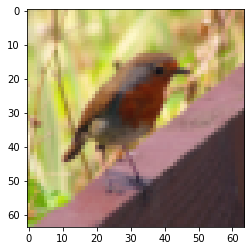

y = 0. It's a non-cat picture.


In [5]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# MyNN <a class='anchor' id='mynn'></a>

In [55]:
from network import NN

In [154]:
def fit(trainer, print_epochs):
    log = {'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]}
    for i, cost in enumerate(trainer, 1):
        log['loss'].append(cost.item())

        pred_y = net.predict(train_x)    
        acc = np.sum(pred_y == train_y)/train_y.shape[1]
        log['accuracy'].append(acc)

        pred_y = net.predict(test_x)
        val_acc = np.sum(pred_y == test_y)/test_y.shape[1]
        log['val_accuracy'].append(val_acc)

        pred_y_prob = net.predict_proba(test_x)    
        val_loss = 1/test_y.shape[1] * np.sum(NN.LOGLOSS(pred_y_prob, test_y), axis=1)
        log['val_loss'].append(val_loss.item())

        if i % print_epochs == 0:
            print(f'{i}. \t'
                  f'accuracy: {acc:.4f} - loss: {cost.item():.3f} -- ' 
                  f'val_accuracy: {val_acc:.4f} - val_loss: {val_loss.item():.3f}')
    return log

## Example 1: XOR <a class='anchor' id='mynn-xor'></a>

In [165]:
train_dataset = XOR_Data(1200)
test_dataset = XOR_Data(600)

This dataset is easier on test data rather than trained data:

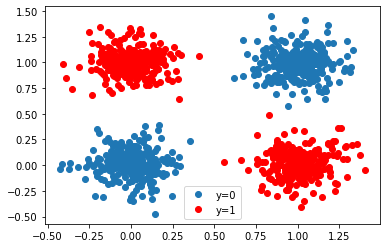

In [166]:
train_dataset.plot_me()

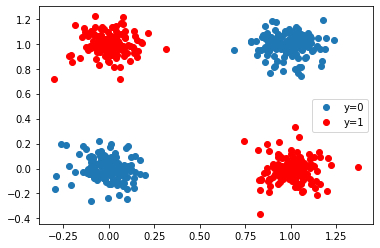

In [167]:
test_dataset.plot_me()

In [168]:
train_x, train_y = train_dataset[:][0], train_dataset[:][1]
test_x, test_y = test_dataset[:][0], test_dataset[:][1]
train_x, train_y = train_x.T, train_y.T
test_x, test_y = test_x.T, test_y.T

As can be seen in the following, this data is not linearly separable:

200. 	accuracy: 0.5067 - loss: 0.697 -- val_accuracy: 0.5017 - val_loss: 0.695
400. 	accuracy: 0.4992 - loss: 0.693 -- val_accuracy: 0.5000 - val_loss: 0.693
600. 	accuracy: 0.4642 - loss: 0.693 -- val_accuracy: 0.4767 - val_loss: 0.693


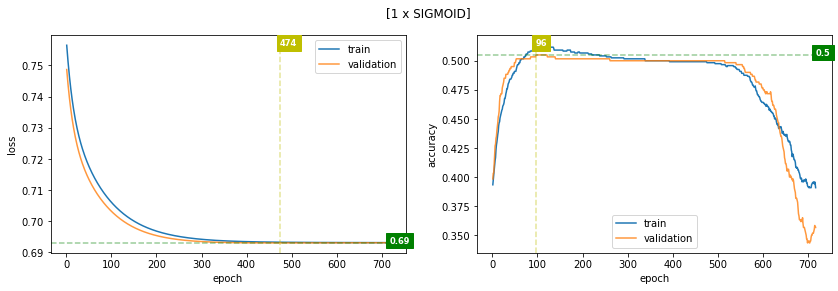

In [169]:
# using one layer one node
net = NN([1], [NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.1, max_iterations=1000, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log, title='[1 x SIGMOID]')

Adding anothre layer will increase performance:

500. 	accuracy: 0.7392 - loss: 0.383 -- val_accuracy: 0.7433 - val_loss: 0.372
1000. 	accuracy: 0.7450 - loss: 0.364 -- val_accuracy: 0.7483 - val_loss: 0.357
1500. 	accuracy: 0.7458 - loss: 0.358 -- val_accuracy: 0.7483 - val_loss: 0.353
2000. 	accuracy: 0.7475 - loss: 0.355 -- val_accuracy: 0.7483 - val_loss: 0.351


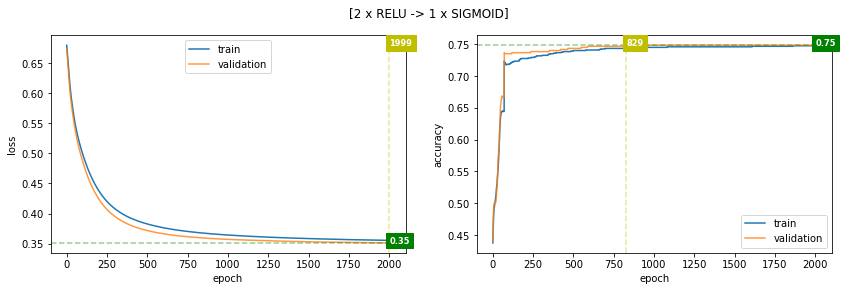

In [170]:
# using two layer three nodes
net = NN([2, 1], [NN.RELU, NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.1, max_iterations=2000, return_cost_every=1)
log = fit(trainer, print_epochs=500)
plot_train_log(log, title='[2 x RELU -> 1 x SIGMOID]')

Adding more nodes to the second layer, gives us the **ideal** classifier:

500. 	accuracy: 0.9983 - loss: 0.039 -- val_accuracy: 1.0000 - val_loss: 0.026
1000. 	accuracy: 0.9983 - loss: 0.019 -- val_accuracy: 1.0000 - val_loss: 0.010
1500. 	accuracy: 0.9983 - loss: 0.013 -- val_accuracy: 1.0000 - val_loss: 0.006
2000. 	accuracy: 0.9992 - loss: 0.010 -- val_accuracy: 1.0000 - val_loss: 0.004


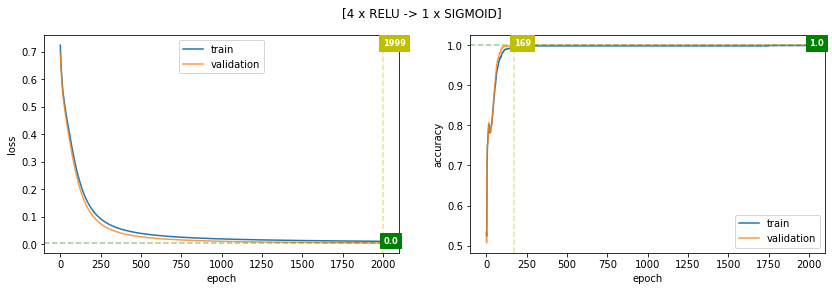

In [171]:
# using two layer five nodes
net = NN([4, 1], [NN.RELU, NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.3, max_iterations=2000, return_cost_every=1)
log = fit(trainer, print_epochs=500)
plot_train_log(log, title='[4 x RELU -> 1 x SIGMOID]')

Adding more layers does **not** necessarily improve performance:

200. 	accuracy: 0.7483 - loss: 0.480 -- val_accuracy: 0.7500 - val_loss: 0.478
400. 	accuracy: 0.7483 - loss: 0.479 -- val_accuracy: 0.7500 - val_loss: 0.478


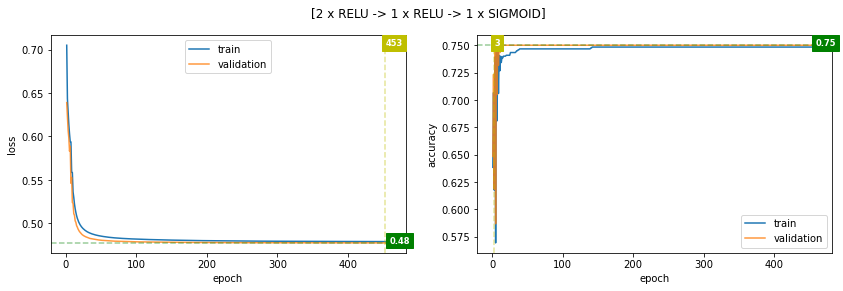

In [172]:
# using three layers four nodes
net = NN([2, 1, 1], [NN.RELU, NN.RELU, NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=1, max_iterations=1000, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log, title='[2 x RELU -> 1 x RELU -> 1 x SIGMOID]')

200. 	accuracy: 0.7483 - loss: 0.357 -- val_accuracy: 0.7500 - val_loss: 0.354
400. 	accuracy: 0.7500 - loss: 0.352 -- val_accuracy: 0.7500 - val_loss: 0.350


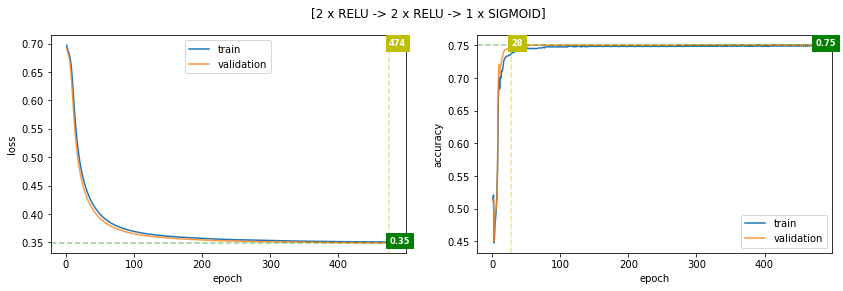

In [173]:
# using three layers five nodes
net = NN([2, 2, 1], [NN.RELU, NN.RELU, NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=1, max_iterations=1000, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log, title='[2 x RELU -> 2 x RELU -> 1 x SIGMOID]')

200. 	accuracy: 0.7483 - loss: 0.386 -- val_accuracy: 0.7500 - val_loss: 0.383
400. 	accuracy: 0.7492 - loss: 0.357 -- val_accuracy: 0.7500 - val_loss: 0.356
600. 	accuracy: 0.7500 - loss: 0.352 -- val_accuracy: 0.7500 - val_loss: 0.352


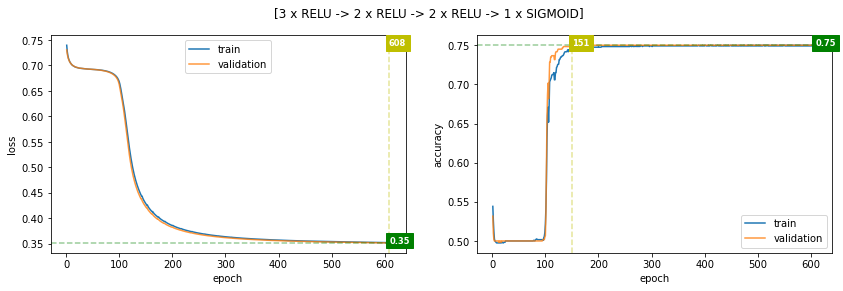

In [174]:
# using three layers five nodes
net = NN([3, 2, 2, 1], [NN.RELU, NN.RELU, NN.RELU, NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.5, max_iterations=1000, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log, title='[3 x RELU -> 2 x RELU -> 2 x RELU -> 1 x SIGMOID]')

## Example 2: Cat vs. not Cat <a class='anchor' id='mynn-cat'></a>

200. 	accuracy: 0.8325 - loss: 0.444 -- val_accuracy: 0.6000 - val_loss: 0.650
400. 	accuracy: 0.8900 - loss: 0.363 -- val_accuracy: 0.6400 - val_loss: 0.623
600. 	accuracy: 0.9043 - loss: 0.311 -- val_accuracy: 0.7200 - val_loss: 0.622
800. 	accuracy: 0.9426 - loss: 0.273 -- val_accuracy: 0.7400 - val_loss: 0.630
1000. 	accuracy: 0.9569 - loss: 0.244 -- val_accuracy: 0.7400 - val_loss: 0.643
1200. 	accuracy: 0.9713 - loss: 0.221 -- val_accuracy: 0.7400 - val_loss: 0.657
1400. 	accuracy: 0.9713 - loss: 0.202 -- val_accuracy: 0.7400 - val_loss: 0.672
1600. 	accuracy: 0.9761 - loss: 0.186 -- val_accuracy: 0.7200 - val_loss: 0.687
1800. 	accuracy: 0.9761 - loss: 0.172 -- val_accuracy: 0.7200 - val_loss: 0.702
2000. 	accuracy: 0.9761 - loss: 0.160 -- val_accuracy: 0.7200 - val_loss: 0.717


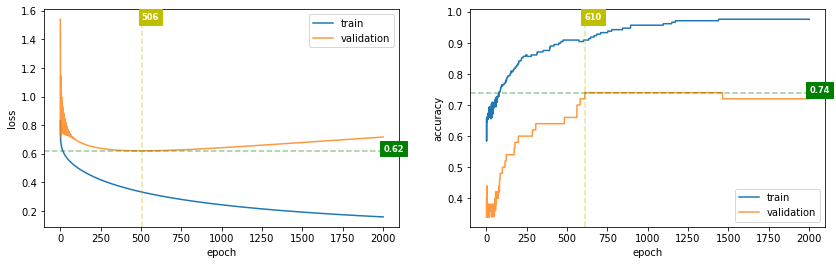

Wall time: 15.8 s


In [7]:
%%time
net = NN([1], [NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.004, max_iterations=2000, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log)

200. 	accuracy: 0.7990 - loss: 0.476 -- val_accuracy: 0.5400 - val_loss: 0.667
400. 	accuracy: 0.8612 - loss: 0.402 -- val_accuracy: 0.6200 - val_loss: 0.631
600. 	accuracy: 0.8947 - loss: 0.352 -- val_accuracy: 0.6400 - val_loss: 0.621
800. 	accuracy: 0.9043 - loss: 0.316 -- val_accuracy: 0.7200 - val_loss: 0.622
1000. 	accuracy: 0.9330 - loss: 0.287 -- val_accuracy: 0.7400 - val_loss: 0.627
1200. 	accuracy: 0.9522 - loss: 0.264 -- val_accuracy: 0.7400 - val_loss: 0.635
1400. 	accuracy: 0.9569 - loss: 0.245 -- val_accuracy: 0.7400 - val_loss: 0.645
1600. 	accuracy: 0.9713 - loss: 0.229 -- val_accuracy: 0.7400 - val_loss: 0.655
1800. 	accuracy: 0.9713 - loss: 0.215 -- val_accuracy: 0.7400 - val_loss: 0.666
2000. 	accuracy: 0.9761 - loss: 0.203 -- val_accuracy: 0.7200 - val_loss: 0.677


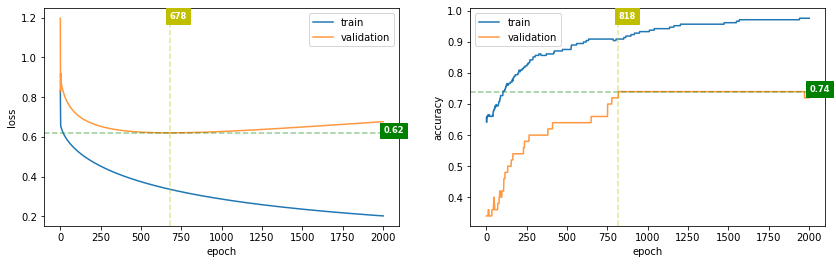

In [8]:
net = NN([1], [NN.SIGMOID], loss_func=NN.LOGLOSS)
trainer = net.train(train_x, train_y, alpha=0.003, max_iterations=2000, lambd=1.0, return_cost_every=1)
log = fit(trainer, print_epochs=200)
plot_train_log(log)

# Pytorch <a class='anchor' id='pytorch'></a>

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

Following function is used to train networks and return the results:

In [11]:
def train(train_loader, validation_loader, model, criterion, optimizer, epochs, terminate_loss = 0, print_epochs=False):    
    log = {'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]}
    train_size, validation_size = len(train_loader.dataset), len(validation_loader.dataset)
    
    for i, epoch in enumerate(range(epochs), 1):        
        
        model.train()
        
        correct = 0
        totloss = 0.0
        for x, y in train_loader:            
            optimizer.zero_grad()
            yhat = model(x) # careful: yhat is the output of last activation function
            loss = criterion(yhat, y)            
            loss.backward()
            optimizer.step()            
            totloss += loss.data.item()
            correct += torch.sum(yhat.round() == y).item()
        log['accuracy'].append(correct / train_size)
        log['loss'].append(totloss * train_loader.batch_size / train_size)
        
        model.eval()
        
        correct = 0
        totloss = 0.0        
        for x,y in validation_loader:            
            with torch.no_grad():
                yhat = model(x)                
                loss = criterion(yhat, y)
                totloss += loss.data.item()
                correct += torch.sum(yhat.round() == y).item()
        log['val_accuracy'].append(correct / validation_size)
        log['val_loss'].append(totloss * validation_loader.batch_size / validation_size)
        
        if print_epochs and i % print_epochs == 0:
            print('Epoch  {}\t loss: {:.4f} - accuracy: {:.4f} -- val_loss: {:.4f} - val_accuracy: {:.4f}'
                  .format(i, log['loss'][-1], log['accuracy'][-1], 
                          log['val_loss'][-1], log['val_accuracy'][-1]))
        if log['loss'][-1] <= terminate_loss and log['val_loss'][-1] <= terminate_loss:
            break
    return log

Generic Torch net for arbitrary fully connected layers similar to *torch.nn.Sequential*:

In [10]:
class TorchNet(torch.nn.Module):
    
    functions = {'relu': torch.relu, 'sigmoid': torch.sigmoid}
    
    def __init__(self, D_in, layers):
        super().__init__()
        assert (len([fstr for _, fstr in layers if fstr not in self.functions]) == 0), 'invalid activation function'        
        self.linears = torch.nn.ModuleList() # this way all linears are registered and parameters are assigned
        self.activations = []
        for D_out, fstr in layers:            
            self.linears.append(torch.nn.Linear(D_in, D_out))
            self.activations.append(self.functions[fstr])
            D_in = D_out        
        
    def forward(self, x):        
        for activation, linear in zip(self.activations, self.linears):
            x = activation(linear(x))
        return x
    
    def __repr__(self):
        return str(list(zip(self.linears, [f.__name__ for f  in self.activations])))

Example:

In [13]:
tnet1 = TorchNet(12288, [(20, 'relu'), (7, 'relu'), (5, 'relu'), (1, 'sigmoid')])
tnet2 = torch.nn.Sequential(torch.nn.Linear(12288, 20), torch.nn.ReLU(),
                            torch.nn.Linear(20, 7), torch.nn.ReLU(), 
                            torch.nn.Linear(7, 5), torch.nn.ReLU(), 
                            torch.nn.Linear(5, 1), torch.nn.Sigmoid())

print('tnet1:\n', tnet1)
print()
print('tnet2:\n', tnet2)

tnet1:
 [(Linear(in_features=12288, out_features=20, bias=True), 'relu'), (Linear(in_features=20, out_features=7, bias=True), 'relu'), (Linear(in_features=7, out_features=5, bias=True), 'relu'), (Linear(in_features=5, out_features=1, bias=True), 'sigmoid')]

tnet2:
 Sequential(
  (0): Linear(in_features=12288, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=1, bias=True)
  (7): Sigmoid()
)


## Example 1: Cat vs. not Cat <a class='anchor' id='pytorch-cat'></a>

In [70]:
class DataCatvsnonCat(Dataset):
    def __init__(self, test=False, flatten=True):
        train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_catvnoncat_data()
        
        # Standardize data to have feature values between 0 and 1.
        train_x = train_set_x_orig/255.
        train_y = train_set_y_orig.T
        test_x = test_set_x_orig/255.
        test_y = test_set_y_orig.T        
        
        if flatten:
            # Reshape the training and test examples 
            train_x = train_x_orig.reshape(train_x_orig.shape[0], -1)
            test_x = test_x_orig.reshape(test_x_orig.shape[0], -1)
            
        
        if not test:
            self.x = train_x
            self.y = train_y
        else:
            self.x = test_x
            self.y = test_y
        self.x = torch.Tensor(self.x)
        self.y = torch.Tensor(self.y)
        
        if not flatten:
            # channels first
            self.x =self.x.permute(0, 3, 1, 2)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.y)

In [9]:
train_data = DataCatvsnonCat()
test_data = DataCatvsnonCat(test=True)
train_loader = DataLoader(dataset=train_data, batch_size=len(train_data), shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=len(test_data))

    note: train_loader.dataset is train_data

Epoch  50	 loss: 0.3435 - accuracy: 0.8804 -- val_loss: 0.5914 - val_accuracy: 0.7200
Epoch  100	 loss: 0.2031 - accuracy: 0.9713 -- val_loss: 0.6947 - val_accuracy: 0.7200
Epoch  150	 loss: 0.1374 - accuracy: 0.9904 -- val_loss: 0.7763 - val_accuracy: 0.7000
Epoch  200	 loss: 0.0983 - accuracy: 0.9952 -- val_loss: 0.8610 - val_accuracy: 0.7000
Epoch  250	 loss: 0.0737 - accuracy: 0.9952 -- val_loss: 0.9383 - val_accuracy: 0.7000
Epoch  300	 loss: 0.0573 - accuracy: 1.0000 -- val_loss: 1.0068 - val_accuracy: 0.7000
Epoch  350	 loss: 0.0459 - accuracy: 1.0000 -- val_loss: 1.0678 - val_accuracy: 0.7000
Epoch  400	 loss: 0.0377 - accuracy: 1.0000 -- val_loss: 1.1223 - val_accuracy: 0.7000


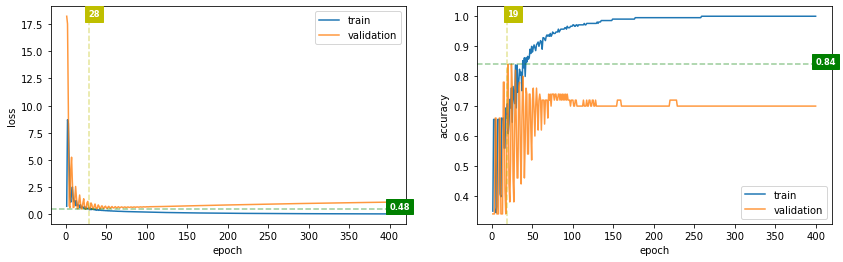

Wall time: 10.1 s


In [15]:
%%time
tnet1 = TorchNet(12288, [(1, 'sigmoid')])
# tnet1 = TorchNet(12288, [(10, 'relu'), (5, 'relu'), (1, 'sigmoid')])
optimizer = torch.optim.Adam(tnet1.parameters(), lr=0.005) # very sensitive to learning rate
criterion = torch.nn.BCELoss()
log = train(train_loader, test_loader, tnet1, criterion, optimizer, epochs=400, print_epochs=50, terminate_loss=0.4)

plot_train_log(log)

Epoch  100	 loss: 0.4270 - accuracy: 0.8612 -- val_loss: 0.6277 - val_accuracy: 0.6400
Epoch  200	 loss: 0.3378 - accuracy: 0.9091 -- val_loss: 0.6074 - val_accuracy: 0.6800
Epoch  300	 loss: 0.2833 - accuracy: 0.9330 -- val_loss: 0.6145 - val_accuracy: 0.7400
Epoch  400	 loss: 0.2450 - accuracy: 0.9569 -- val_loss: 0.6298 - val_accuracy: 0.7400
Epoch  500	 loss: 0.2161 - accuracy: 0.9713 -- val_loss: 0.6481 - val_accuracy: 0.7200
Epoch  600	 loss: 0.1934 - accuracy: 0.9713 -- val_loss: 0.6673 - val_accuracy: 0.7000
Epoch  700	 loss: 0.1750 - accuracy: 0.9761 -- val_loss: 0.6867 - val_accuracy: 0.7000
Epoch  800	 loss: 0.1597 - accuracy: 0.9761 -- val_loss: 0.7057 - val_accuracy: 0.7000
Epoch  900	 loss: 0.1468 - accuracy: 0.9856 -- val_loss: 0.7241 - val_accuracy: 0.7000
Epoch  1000	 loss: 0.1357 - accuracy: 0.9904 -- val_loss: 0.7419 - val_accuracy: 0.7000


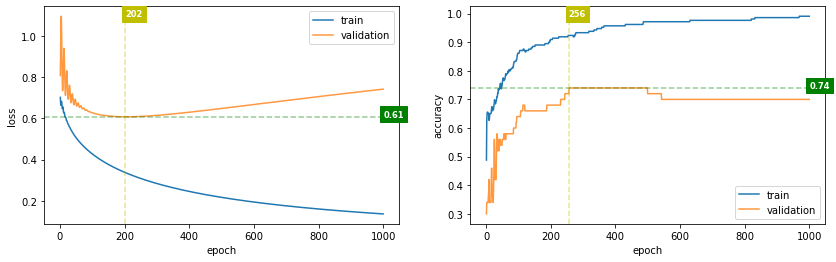

Wall time: 23.6 s


In [16]:
%%time
tnet2 = torch.nn.Sequential(torch.nn.Linear(12288, 1), torch.nn.Sigmoid())
optimizer = torch.optim.SGD(tnet2.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.BCELoss()
log = train(train_loader, test_loader, tnet2, criterion, optimizer, epochs=1000, print_epochs=100)

plot_train_log(log)

### using CNN

**Why we use CNN?**

Every image maps to 64x64x3 features. If we feed in this number of features to a two layer network with (10+1) hidden units, there will be more than 122,880 parameters to be learned. We use CNNs to extract representation from training samples and reduce the number of features.

Following images are taken from:
https://www.coursera.org/learn/deep-neural-networks-with-pytorch

**Activation Map**

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3block_digram.png" width = 1000, align = "center">

**Multiple Input Channels One Output Channel**

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.22chanalsinput.png" width = 750, align = "center">

**Multiple Input and Multiple Output Channels**

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2mulit_input_output.png" width = 750, align = "center">

In [79]:
train_data = DataCatvsnonCat(test=False, flatten=False)
test_data = DataCatvsnonCat(test=True, flatten=False)
train_loader = DataLoader(dataset=train_data, batch_size=len(train_data), shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=len(test_data))
print(f'x shape: {train_data[:][0].shape}\ny shape: {train_data[:][1].shape}') # for x: channels first

x shape: torch.Size([209, 3, 64, 64])
y shape: torch.Size([209, 1])


In [80]:
# ref: # ref: https://www.coursera.org/learn/deep-neural-networks-with-pytorch
def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [97]:

conv_output_shape((64, 64), kernel_size=2)

(63, 63)

In [190]:
class TorchCNN(torch.nn.Module):        
    
    def __init__(self):
        super().__init__()
        
        self.cnn1 = torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, padding=0)
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, padding=0)
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = torch.nn.Linear(225, 1)
        
    def forward(self, x):        
        x = self.cnn1(x)        
        x = torch.relu(x)
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        
        # flatten output
        x = x.view(x.size(0),-1)
        
        x = self.fc1(x)
        x = torch.sigmoid(x)
        return x        

tnetcnn1 = TorchCNN()
tnetcnn1

TorchCNN(
  (cnn1): Conv2d(3, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=225, out_features=1, bias=True)
)

In [217]:
tnetcnn2 = torch.nn.Sequential()
tnetcnn2.add_module('cnn1', torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1))
# tnetcnn2.add_module('relu1', torch.nn.ReLU())
tnetcnn2.add_module('cnn1bn', torch.nn.BatchNorm2d(1))
tnetcnn2.add_module('maxpool1', torch.nn.MaxPool2d(kernel_size=2))
# tnetcnn2.add_module('dropout1', torch.nn.Dropout2d(0.2))
tnetcnn2.add_module('cnn2', torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1))
# tnetcnn2.add_module('relu2', torch.nn.ReLU())
tnetcnn2.add_module('cnn2bn', torch.nn.BatchNorm2d(1))
tnetcnn2.add_module('maxpool2', torch.nn.MaxPool2d(kernel_size=2))
# tnetcnn2.add_module('dropout2', torch.nn.Dropout2d(0.2))
tnetcnn2.add_module('flatten', torch.nn.Flatten())
tnetcnn2.add_module('fcn1', torch.nn.Linear(256, 1))
tnetcnn2.add_module('sigmoid1', torch.nn.Sigmoid())
tnetcnn2

Sequential(
  (cnn1): Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn1bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn2bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fcn1): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid1): Sigmoid()
)

Epoch  20	 loss: 0.6261 - accuracy: 0.6507 -- val_loss: 0.7090 - val_accuracy: 0.5000
Epoch  40	 loss: 0.5861 - accuracy: 0.6842 -- val_loss: 0.6864 - val_accuracy: 0.5600
Epoch  60	 loss: 0.5499 - accuracy: 0.7129 -- val_loss: 0.6912 - val_accuracy: 0.5000
Epoch  80	 loss: 0.5142 - accuracy: 0.7368 -- val_loss: 0.6900 - val_accuracy: 0.4600
Epoch  100	 loss: 0.4659 - accuracy: 0.7560 -- val_loss: 0.6868 - val_accuracy: 0.4800


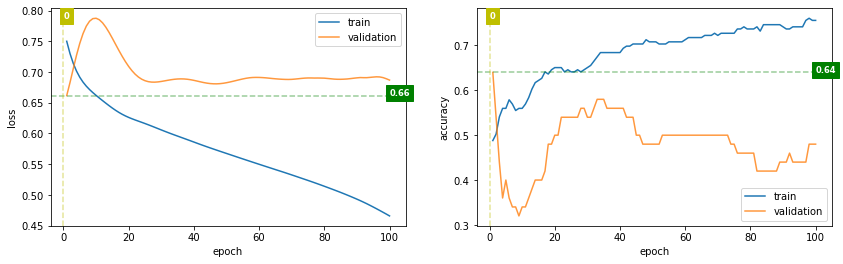

Wall time: 35.5 s


In [218]:
%%time
# tnetcnn = tnetcnn1
tnetcnn = tnetcnn2
optimizer = torch.optim.Adam(tnetcnn.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()
log = train(train_loader, test_loader, tnetcnn, criterion, optimizer, epochs=100, print_epochs=20)

plot_train_log(log)

# Keras <a class='anchor' id='keras'></a>

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Example 1: Cat vs. not Cat <a class='anchor' id='keras-cat'></a>

In [7]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_catvnoncat_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
train_y = train_y.T
test_y = test_y.T
assert( train_x.shape[0] == train_y.shape[0] and test_x.shape[0] == test_y.shape[0])

print ("train_x's shape: ", train_x.shape)
print ("test_x's shape: ", test_x.shape)

train_x's shape:  (209, 12288)
test_x's shape:  (50, 12288)


In [8]:
from tensorflow import random
random.set_seed(3)

num_pixels = train_x.shape[1]

model = Sequential()

model.add(Dense(1, activation='sigmoid', input_shape=(num_pixels, )))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

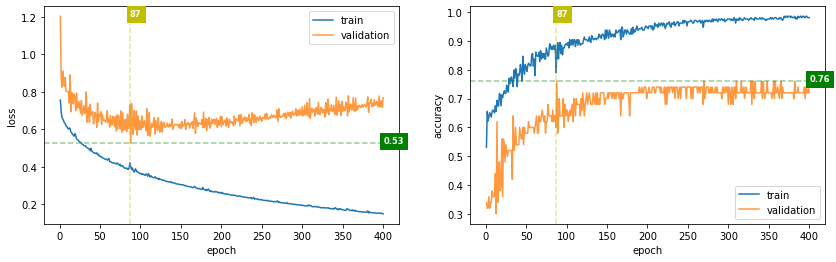

Wall time: 19.7 s


In [9]:
%%time
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=400, verbose=0)
plot_train_log(history.history)

In [10]:
model.evaluate(train_x, train_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9856


[0.14890587329864502, 0.9856459498405457]

In [11]:
model.evaluate(test_x, test_y)

2/2 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.7200


[0.7686911225318909, 0.7200000286102295]

### using CNN

In [12]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_catvnoncat_data()
# Standardize data to have feature values between 0 and 1.
train_x = train_x_orig/255.
test_x = test_x_orig/255.
train_y = train_y.T
test_y = test_y.T
assert( train_x.shape[0] == train_y.shape[0] and test_x.shape[0] == test_y.shape[0])

print ("train_x's shape: ", train_x.shape)
print ("test_x's shape: ", test_x.shape)

train_x's shape:  (209, 64, 64, 3)
test_x's shape:  (50, 64, 64, 3)


In [13]:
from tensorflow.keras.layers import Conv2D # to add convolutional layers
from tensorflow.keras.layers import MaxPooling2D # to add pooling layers
from tensorflow.keras.layers import Flatten # to flatten data for fully connected layers
from tensorflow.keras.layers import Dropout # use dropout to reduce overfitting and train every neurons
from tensorflow.keras.layers import BatchNormalization, Activation # use batchnormalization before activations to speed up learning

In [14]:
# create model
model = Sequential()
model.add(Conv2D(2, (3, 3), strides=(1, 1), input_shape=train_x.shape[1:])) #channel last
model.add(BatchNormalization()) # normalize activations to speed up learning
model.add(Activation('relu')) # batch normalization comes before activations
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(8, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# compile model
adam_optim = Adam(learning_rate=0.003)
model.compile(optimizer=adam_optim, loss='binary_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 2)         56        
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 2)         8         
_________________________________________________________________
activation (Activation)      (None, 62, 62, 2)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 2)         0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 4)         76        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)        

Using CNN, we reduced the number of parameters from 122,880 to 1,661 and improved accuracy to 0.91.

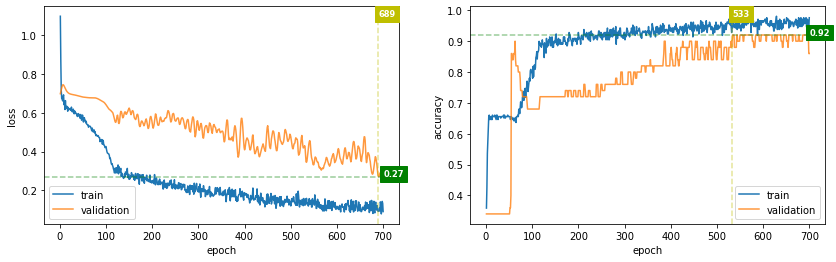

Wall time: 4min 31s


In [15]:
%%time
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=700, batch_size=train_x.shape[0], verbose=0)
plot_train_log(history.history)

In [16]:
model.evaluate(test_x, test_y)

2/2 [==============================] - 0s 11ms/step - loss: 0.3159 - accuracy: 0.8600


[0.31593090295791626, 0.8600000143051147]

In [17]:
model.evaluate(train_x, train_y)

7/7 [==============================] - 0s 21ms/step - loss: 0.1656 - accuracy: 0.9569


[0.16564950346946716, 0.9569377899169922]

# Tensorflow <a class='anchor' id='tensorflow'></a>

## Example 1: Cat vs. not Cat <a class='anchor' id='tensforflow-cat'></a>